In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import random
from keras.layers.convolutional import MaxPooling2D
from sklearn.metrics import mean_squared_error
import theano
from keras import optimizers
from tensorflow.keras import datasets, layers, models
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
from tqdm import tqdm
gendata = pd.read_excel('Generated promoters & Candidates (#10000) (1).xlsx')
natdata = pd.read_excel('PCC6803 Promoter and reads 100bp.xlsx')

Using TensorFlow backend.


In [7]:
def checkseq(seq,target,bindo):
    checklist = []
    for j in range(100-6+1):
        check = 0
        for i in seq:
            if i[j:j+6] == target:
                check+=1
        checklist.append(check/bindo)
    return checklist

In [3]:
gen_promoter = gendata['promoter'].tolist()

In [4]:
nat_promoter = natdata['Promoter'].tolist()
nat_reads = natdata['Reads'].tolist()

In [8]:
nat_tataat = checkseq(nat_promoter,'TATAAT',3712)
nat_taaaat = checkseq(nat_promoter,'TAAAAT',3712)
nat_tagaat = checkseq(nat_promoter,'TAGAAT',3712)
nat_aaaata = checkseq(nat_promoter,'AAAATA',3712)
nat_aaaatt = checkseq(nat_promoter,'AAAATT',3712)
nat_ttaaaa = checkseq(nat_promoter,'TTAAAA',3712)
gen_tataat = checkseq(gen_promoter,'TATAAT',3712)
gen_taaaat = checkseq(gen_promoter,'TAAAAT',3712)
gen_tagaat = checkseq(gen_promoter,'TAGAAT',3712)
gen_aaaata = checkseq(gen_promoter,'AAAATA',3712)
gen_aaaatt = checkseq(gen_promoter,'AAAATT',3712)
gen_ttaaaa = checkseq(gen_promoter,'TTAAAA',3712)

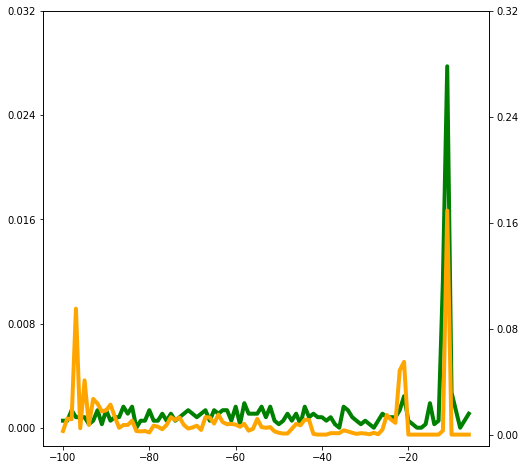

In [89]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
 
color1 = 'green'
ax1.plot(range(-100,-5), nat_aaaata, color=color1, label = 'Natural',linewidth = 4)
ax1.set_yticks(np.arange(0.00,0.04,0.008))
#ax1.set_xlabel('Distance to TSS', fontsize = 18)
#ax1.set_ylabel('TAGAAT frequency (Natural)', fontsize = 18)
ax1.tick_params(axis='y')

 
color2 = 'orange'
ax2 = ax1.twinx()
ax2.plot(range(-100,-5), gen_aaaata, color=color2,  label = 'Generated',linewidth = 4)
#ax2.set_ylabel('TAGAAT frequency (Generated)', fontsize = 18)
ax2.tick_params(axis='y')
ax2.set_yticks(np.arange(0.00,0.4,0.08))
#fig.legend(loc =(0.19,0.835))

plt.show()